/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
240/240 - 4s - 18ms/step - accuracy: 0.8826 - loss: 0.4354 - val_accuracy: 0.9402 - val_loss: 0.2248
Epoch 2/10
240/240 - 4s - 15ms/step - accuracy: 0.9466 - loss: 0.1906 - val_accuracy: 0.9553 - val_loss: 0.1593
Epoch 3/10
240/240 - 3s - 11ms/step - accuracy: 0.9617 - loss: 0.1340 - val_accuracy: 0.9651 - val_loss: 0.1239
Epoch 4/10
240/240 - 3s - 10ms/step - accuracy: 0.9704 - loss: 0.1019 - val_accuracy: 0.9691 - val_loss: 0.1087
Epoch 5/10
240/240 - 2s - 9ms/step - accuracy: 0.9775 - loss: 0.0808 - val_accuracy: 0.9695 - val_loss: 0.1036
Epoch 6/10
240/240 - 4s - 16ms/step - accuracy: 0.9815 - loss: 0.0663 - val_accuracy: 0.9714 - val_loss: 0.0938
Epoch 7/10
240/240 - 4s - 15ms/step - accuracy: 0.9852 - loss: 0.0542 - val_accuracy: 0.9731 - val_loss: 0.0925
Epoch 8/10
240/240 - 3s - 11ms/step - accuracy: 0.9870 - loss: 0.0466 - val_accuracy: 0.9741 - val_loss: 0.0892
Epoch 9/10
240/240 - 3s - 11ms/step - accuracy: 0.9901 - loss: 0.0384 - val_accuracy: 0.9743 - val_loss: 

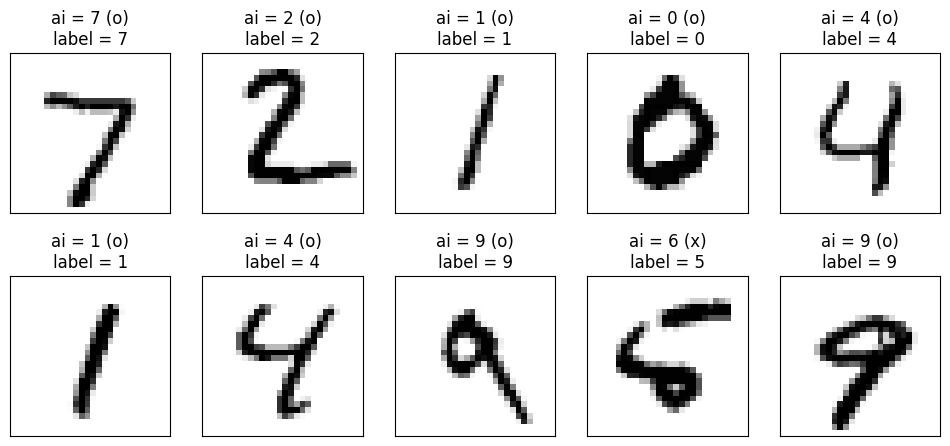

In [14]:
import numpy as np
# Instead of from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical # Import to_categorical directly from tensorflow.keras.utils
np.random.seed(10)
#from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense


def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')

        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[start_id])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[start_id]==labels[start_id] else ' (x)')
            title += '\nlabel = ' + str(labels[start_id])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[start_id])

        # X, Y 軸不顯示刻度
        ax.set_title(title,fontsize=12)
        ax.set_xticks([]);ax.set_yticks([])
        start_id+=1
    plt.show()

#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤
#(train_feature, train_label),\
#(test_feature, test_label) = mnist.load_data()

#show_image(train_feature[0])
#show_images_labels_predictions(train_feature,train_label,[],0,10)

#將 Features 特徵值轉換為 784個 float 數字的 1 維向量
train_feature_vector =train_feature.reshape(len(train_feature), 784).astype('float32')
test_feature_vector = test_feature.reshape(len( test_feature), 784).astype('float32')

#Features 特徵值標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

#label 轉換為 One-Hot Encoding 編碼
train_label_onehot = to_categorical(train_label)
test_label_onehot = to_categorical(test_label)

#建立模型
model = Sequential()
#輸入層：784, 隱藏層：256，輸出層：10
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))
#定義訓練方式
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練10次、每批次讀取200筆資料，顯示簡易訓練過程
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,validation_split=0.2,
                         epochs=10, batch_size=200,verbose=2)

#評估準確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=',scores[1])

#預測
#prediction=model.predict_classes(test_feature_normalize)
prediction=np.argmax(model.predict(test_feature_normalize), axis=-1)

#顯示圖像、預測值、真實值
show_images_labels_predictions(test_feature,test_label,prediction,0)

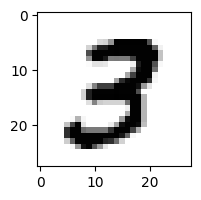

In [9]:
import matplotlib.pyplot as plt
show_image(train_feature[7])

成功讀取 12 張圖片。
Epoch 1/10
1/1 - 2s - 2s/step - accuracy: 0.1429 - loss: 2.5380 - val_accuracy: 0.0000e+00 - val_loss: 3.6523
Epoch 2/10
1/1 - 0s - 90ms/step - accuracy: 0.4286 - loss: 1.5652 - val_accuracy: 0.0000e+00 - val_loss: 4.9527
Epoch 3/10
1/1 - 0s - 93ms/step - accuracy: 0.4286 - loss: 1.3978 - val_accuracy: 0.0000e+00 - val_loss: 5.6904
Epoch 4/10
1/1 - 0s - 89ms/step - accuracy: 0.5714 - loss: 1.2643 - val_accuracy: 0.0000e+00 - val_loss: 6.2637
Epoch 5/10
1/1 - 0s - 89ms/step - accuracy: 0.5714 - loss: 1.1577 - val_accuracy: 0.0000e+00 - val_loss: 6.7018
Epoch 6/10
1/1 - 0s - 92ms/step - accuracy: 0.7143 - loss: 1.0185 - val_accuracy: 0.0000e+00 - val_loss: 7.1422
Epoch 7/10
1/1 - 0s - 182ms/step - accuracy: 0.5714 - loss: 0.9185 - val_accuracy: 0.0000e+00 - val_loss: 7.4934
Epoch 8/10
1/1 - 0s - 91ms/step - accuracy: 0.8571 - loss: 0.8545 - val_accuracy: 0.0000e+00 - val_loss: 7.7451
Epoch 9/10
1/1 - 0s - 88ms/step - accuracy: 0.8571 - loss: 0.7871 - val_accuracy: 0.0000e+00

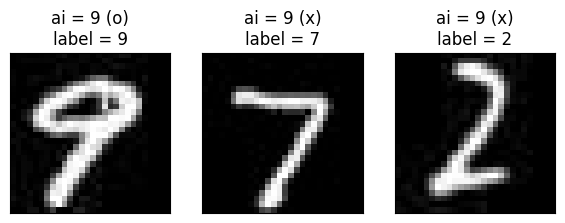

In [22]:
import os
import cv2
import numpy as np
import re  # 新增正則表達式模組
from tensorflow.keras.utils import to_categorical  # 使用 tensorflow 的 to_categorical
np.random.seed(10)
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# 設定圖片資料夾路徑
data_dir = '/content/drive/MyDrive/機器學習與深度學習/irs_17412244664072089f5362ff9c77ae988d912293d2db2cc6a0/imagedata'  # 替換成你的資料夾名稱

# 用來存放圖片和標籤
features = []
labels = []

# 讀取圖片並從檔名中提取標籤
for file in os.listdir(data_dir):
    img_path = os.path.join(data_dir, file)
    if file.endswith('.jpg'):  # 確保是 .jpg 檔案
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # 以灰階模式讀取圖片
        if img is not None:
            img = cv2.resize(img, (28, 28))  # 調整圖片大小到 28x28 (如果需要)
            features.append(img)

            # 從檔名中提取標籤，例如 "9_1.jpg" 或 "9-4.jpg" 提取標籤 9
            match = re.match(r'(\d+)', file)
            if match:
                label = match.group(1)  # 取得數字部分
                labels.append(int(label))  # 將標籤轉為整數
            else:
                print(f"無法從檔名 {file} 中提取標籤，已跳過該圖片。")

# 將圖片和標籤轉換為 numpy 陣列
train_feature = np.array(features)
train_label = np.array(labels)

# 顯示讀取到的圖片數量
print(f"成功讀取 {len(train_feature)} 張圖片。")

# Check if any images were loaded
if len(train_feature) == 0:
    print("Error: No images were loaded. Please check your data directory and file paths.")
else:
    # 顯示範例圖片
    def show_image(image):
        fig = plt.gcf()
        fig.set_size_inches(2, 2)
        plt.imshow(image, cmap='binary')
        plt.show()

    # 修改後的 show_images_labels_predictions 函式，避免索引錯誤
    def show_images_labels_predictions(images, labels, predictions, start_id, num=10):
        plt.gcf().set_size_inches(12, 14)
        if num > 25: num = 25
        for i in range(0, num):
            if start_id >= len(predictions) or start_id >= len(images) or start_id >= len(labels):
                break  # 超過預測數量或資料數量時停止
            ax = plt.subplot(5, 5, 1 + i)
            ax.imshow(images[start_id], cmap='binary')
            if len(predictions) > 0:
                title = 'ai = ' + str(predictions[start_id])
                title += (' (o)' if predictions[start_id] == labels[start_id] else ' (x)')
                title += '\nlabel = ' + str(labels[start_id])
            else:
                title = 'label = ' + str(labels[start_id])
            ax.set_title(title, fontsize=12)
            ax.set_xticks([]); ax.set_yticks([])
            start_id += 1
        plt.show()

    # 將 Features 特徵值轉換為 784個 float 數字的 1 維向量
    train_feature_vector = train_feature.reshape(len(train_feature), 784).astype('float32')

    # Features 特徵值標準化
    train_feature_normalize = train_feature_vector / 255

    # label 轉換為 One-Hot Encoding 編碼
    train_label_onehot = to_categorical(train_label)

    # 拆分訓練資料和測試資料
    train_feature_normalize, test_feature_normalize, train_label_onehot, test_label_onehot = train_test_split(
        train_feature_normalize, train_label_onehot, test_size=0.2, random_state=10
    )

    # 建立模型
    model = Sequential()
    model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

    # 定義訓練方式
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # 訓練模型
    train_history = model.fit(x=train_feature_normalize,
                              y=train_label_onehot, validation_split=0.2,
                              epochs=10, batch_size=200, verbose=2)

    # 評估準確率
    scores = model.evaluate(test_feature_normalize, test_label_onehot)
    print('\n準確率 =', scores[1])

    # 預測
    prediction = np.argmax(model.predict(test_feature_normalize), axis=-1)

    # 將 One-Hot Encoding 轉回標籤格式
    test_label = np.argmax(test_label_onehot, axis=1)

    # 顯示測試資料的圖像、預測值、真實值
    max_show = min(len(prediction), 10)  # 確保顯示數量不超過預測數量
    show_images_labels_predictions(test_feature_normalize.reshape(-1, 28, 28), test_label, prediction, 0, num=max_show)


In [44]:
import numpy as np
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical # Import to_categorical directly from tensorflow.keras.utils
np.random.seed(10)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense


#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤
(train_feature, train_label),\
(test_feature, test_label) = mnist.load_data()

#將 Features 特徵值轉換為 784個 float 數字的 1 維向量
train_feature_vector =train_feature.reshape(len(train_feature), 784).astype('float32')
test_feature_vector = test_feature.reshape(len( test_feature), 784).astype('float32')

#Features 特徵值標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

#label 轉換為 One-Hot Encoding 編碼
train_label_onehot = to_categorical(train_label) # Use to_categorical directly
test_label_onehot = to_categorical(test_label) # Use to_categorical directly

#建立模型
model = Sequential()
#輸入層：784, 隱藏層：256，輸出層：10
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))
#定義訓練方式
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練10次、每批次讀取200筆資料，顯示簡易訓練過程
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,validation_split=0.2,
                         epochs=10, batch_size=200,verbose=2)

#評估準確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=',scores[1])

#將模型儲存至 HDF5檔案中
model.save('/content/drive/MyDrive/機器學習與深度學習/irs_17412244664072089f5362ff9c77ae988d912293d2db2cc6a0/Mnist_mlp_model-11146070.h5')
print("Mnist_mlp_model.h5 模型儲存完畢!")
del model

Epoch 1/10
240/240 - 3s - 13ms/step - accuracy: 0.8820 - loss: 0.4396 - val_accuracy: 0.9411 - val_loss: 0.2140
Epoch 2/10
240/240 - 2s - 8ms/step - accuracy: 0.9472 - loss: 0.1869 - val_accuracy: 0.9573 - val_loss: 0.1536
Epoch 3/10
240/240 - 2s - 9ms/step - accuracy: 0.9617 - loss: 0.1325 - val_accuracy: 0.9651 - val_loss: 0.1259
Epoch 4/10
240/240 - 3s - 12ms/step - accuracy: 0.9710 - loss: 0.1009 - val_accuracy: 0.9668 - val_loss: 0.1138
Epoch 5/10
240/240 - 3s - 14ms/step - accuracy: 0.9766 - loss: 0.0805 - val_accuracy: 0.9695 - val_loss: 0.1005
Epoch 6/10
240/240 - 4s - 16ms/step - accuracy: 0.9822 - loss: 0.0651 - val_accuracy: 0.9727 - val_loss: 0.0899
Epoch 7/10
240/240 - 2s - 10ms/step - accuracy: 0.9845 - loss: 0.0542 - val_accuracy: 0.9729 - val_loss: 0.0899
Epoch 8/10
240/240 - 3s - 12ms/step - accuracy: 0.9872 - loss: 0.0453 - val_accuracy: 0.9713 - val_loss: 0.0921
Epoch 9/10
240/240 - 4s - 18ms/step - accuracy: 0.9897 - loss: 0.0383 - val_accuracy: 0.9750 - val_loss: 0


準確率= 0.9778000116348267
Mnist_mlp_model.h5 模型儲存完畢!


成功找到資料夾: /content/drive/MyDrive/機器學習與深度學習/irs_17412244664072089f5362ff9c77ae988d912293d2db2cc6a0/imagedata
成功讀取 9 張圖片。
載入模型 Mnist_mlp_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


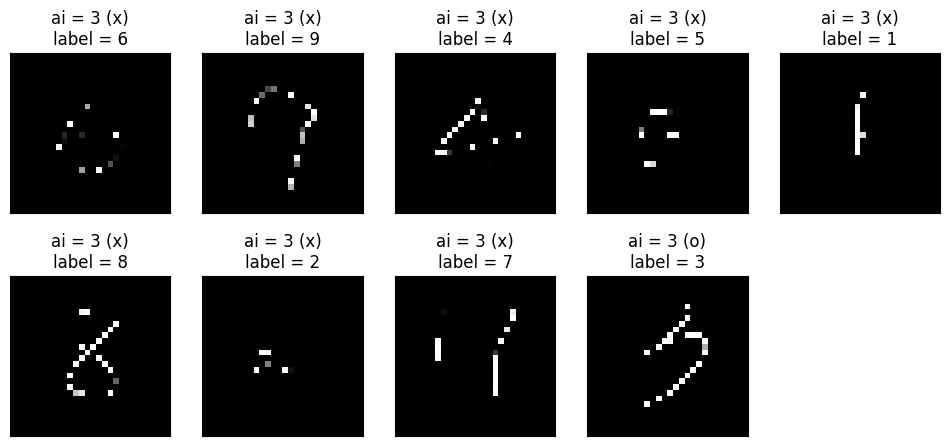

In [47]:
import os
import cv2
import numpy as np
import re  # 用來處理檔名提取標籤
from keras.models import load_model
import matplotlib.pyplot as plt

np.random.seed(10)

# 設定圖片資料夾絕對路徑
data_dir = '/content/drive/MyDrive/機器學習與深度學習/irs_17412244664072089f5362ff9c77ae988d912293d2db2cc6a0/imagedata'  # 替換成你的實際路徑

# 確認資料夾是否存在
if not os.path.exists(data_dir):
    print(f"Error: 找不到資料夾 {data_dir}")
else:
    print(f"成功找到資料夾: {data_dir}")

# 用來存放圖片和標籤
features = []
labels = []

# 讀取圖片並從檔名中提取標籤
for file in os.listdir(data_dir):
    img_path = os.path.join(data_dir, file)
    if file.endswith('.jpg'):  # 確保是 .jpg 檔案
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # 以灰階模式讀取圖片
        if img is not None:
            img = cv2.resize(img, (28, 28))  # 調整圖片大小到 28x28 (如果需要)
            features.append(img)

            # 從檔名中提取標籤，例如 "1.jpg" 或 "9.jpg" 提取標籤
            match = re.match(r'(\d+)', file)
            if match:
                label = match.group(1)  # 取得數字部分
                labels.append(int(label))  # 將標籤轉為整數
            else:
                print(f"無法從檔名 {file} 中提取標籤，已跳過該圖片。")

# 將圖片和標籤轉換為 numpy 陣列
test_feature = np.array(features)
test_label = np.array(labels)

# 顯示讀取到的圖片數量
print(f"成功讀取 {len(test_feature)} 張圖片。")

# Check if any images were loaded
if len(test_feature) == 0:
    print("Error: No images were loaded. Please check your data directory and file paths.")
else:
    # 顯示範例圖片
    def show_images_labels_predictions(images, labels, predictions, start_id, num=10):
        plt.gcf().set_size_inches(12, 14)
        if num > 25: num = 25
        for i in range(0, num):
            if start_id >= len(predictions) or start_id >= len(images) or start_id >= len(labels):
                break  # 超過預測數量或資料數量時停止
            ax = plt.subplot(5, 5, 1 + i)
            ax.imshow(images[start_id], cmap='binary')
            if len(predictions) > 0:
                title = 'ai = ' + str(predictions[start_id])
                title += (' (o)' if predictions[start_id] == labels[start_id] else ' (x)')
                title += '\nlabel = ' + str(labels[start_id])
            else:
                title = 'label = ' + str(labels[start_id])
            ax.set_title(title, fontsize=12)
            ax.set_xticks([]); ax.set_yticks([])
            start_id += 1
        plt.show()

    # 將 Features 特徵值轉換為 784個 float 數字的 1 維向量
    test_feature_vector = test_feature.reshape(len(test_feature), 784).astype('float32')

    # Features 特徵值標準化
    test_feature_normalize = test_feature_vector / 255

    # 從 HDF5 檔案中載入模型
    print("載入模型 Mnist_mlp_model.h5")
    if not os.path.exists('/content/drive/MyDrive/機器學習與深度學習/irs_17412244664072089f5362ff9c77ae988d912293d2db2cc6a0/Mnist_mlp_model-11146070.h5'):
        print("Error: Mnist_mlp_model.h5 not found. Please make sure the model file is in the current directory.")
    else:
        model = load_model('/content/drive/MyDrive/機器學習與深度學習/irs_17412244664072089f5362ff9c77ae988d912293d2db2cc6a0/Mnist_mlp_model-11146070.h5')

        # 預測
        prediction = np.argmax(model.predict(test_feature_normalize), axis=-1)

        # 顯示圖像、預測值、真實值
        max_show = min(len(prediction), 10)  # 確保顯示數量不超過預測數量
        show_images_labels_predictions(test_feature, test_label, prediction, 0, num=max_show)
